In [26]:
import numpy as np 
from numpy.random import default_rng
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl 
import math
import random
from scipy.stats import multivariate_normal
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import seaborn as sns
import string

In [27]:
def estimate_conv_mu(data):
    true_labels = data.index.unique().tolist()
    data_info   = pd.DataFrame(columns=['True Class Label', 'Covariance Matrix', 'Mean Vector', 'Number of Samples', 'Class Prior'])
    total_samples = 0
    for true_label in true_labels:
        temp = data.loc[true_label, :]
        #cov = np.cov(temp, bias=True)
        cov  = temp.cov().to_numpy()
        mean = temp.mean(axis=0).tolist()
        n = temp.shape[0]
        total_samples = total_samples + n
        d = {'True Class Label': true_label, 'Covariance Matrix': cov, 'Mean Vector': mean, 'Number of Samples': n}
        # data_info = data_info.append(d, ignore_index=True)
        new_row = pd.DataFrame([d])
        data_info = pd.concat([data_info, new_row], ignore_index=True)
    data_info['Class Prior'] = data_info['Number of Samples'] / total_samples
    return data_info

In [28]:
x_test = r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_3\PART_B\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt'
y_test = r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_3\PART_B\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt'
x_train = r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_3\PART_B\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt'
y_train = r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_3\PART_B\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt'

In [29]:
letters = []
for letter_a in string.ascii_letters:
    for letter_b in string.ascii_letters[:11]:
        letters.append(letter_a+letter_b)
letters = letters[:561]
print(letters)


test_id = pd.read_csv(y_test, names=['Index'])
test_df = pd.read_csv(x_test, delim_whitespace=True, names=letters)
test_df = test_df.set_index(keys=test_id['Index'], drop=True)
train_id = pd.read_csv(y_train, names=['Index'])
train_df = pd.read_csv(x_train, delim_whitespace=True, names=letters)
train_df = train_df.set_index(keys=train_id['Index'], drop=True)
activity_df = pd.concat([test_df, train_df])
activity_df = activity_df.loc[:, ['aa','ab','ac','Yh', 'Yi', 'Yj']]
print(activity_df)

['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'ba', 'bb', 'bc', 'bd', 'be', 'bf', 'bg', 'bh', 'bi', 'bj', 'bk', 'ca', 'cb', 'cc', 'cd', 'ce', 'cf', 'cg', 'ch', 'ci', 'cj', 'ck', 'da', 'db', 'dc', 'dd', 'de', 'df', 'dg', 'dh', 'di', 'dj', 'dk', 'ea', 'eb', 'ec', 'ed', 'ee', 'ef', 'eg', 'eh', 'ei', 'ej', 'ek', 'fa', 'fb', 'fc', 'fd', 'fe', 'ff', 'fg', 'fh', 'fi', 'fj', 'fk', 'ga', 'gb', 'gc', 'gd', 'ge', 'gf', 'gg', 'gh', 'gi', 'gj', 'gk', 'ha', 'hb', 'hc', 'hd', 'he', 'hf', 'hg', 'hh', 'hi', 'hj', 'hk', 'ia', 'ib', 'ic', 'id', 'ie', 'if', 'ig', 'ih', 'ii', 'ij', 'ik', 'ja', 'jb', 'jc', 'jd', 'je', 'jf', 'jg', 'jh', 'ji', 'jj', 'jk', 'ka', 'kb', 'kc', 'kd', 'ke', 'kf', 'kg', 'kh', 'ki', 'kj', 'kk', 'la', 'lb', 'lc', 'ld', 'le', 'lf', 'lg', 'lh', 'li', 'lj', 'lk', 'ma', 'mb', 'mc', 'md', 'me', 'mf', 'mg', 'mh', 'mi', 'mj', 'mk', 'na', 'nb', 'nc', 'nd', 'ne', 'nf', 'ng', 'nh', 'ni', 'nj', 'nk', 'oa', 'ob', 'oc', 'od', 'oe', 'of', 'og', 'oh', 'oi', 'oj', 'ok', 'pa', 'pb

In [30]:
data_info = estimate_conv_mu(data=activity_df)
print(data_info)

  True Class Label                                  Covariance Matrix  \
0                5  [[0.00036921604635520294, 0.000214929947870335...   
1                4  [[0.0017093091050872974, -0.000655850443249244...   
2                6  [[0.00927304625854196, 0.001667610076188494, -...   
3                1  [[0.002446129085148185, 9.115306702391726e-06,...   
4                3  [[0.008281377883263693, -0.0003219415530424633...   
5                2  [[0.005760060826061856, 0.0006958495252757265,...   

                                         Mean Vector Number of Samples  \
0  [0.2791534940503672, -0.016151886473745016, -0...              1906   
1  [0.27305961441896454, -0.012689573083263928, -...              1777   
2  [0.2686486432962449, -0.01831772806850823, -0....              1944   
3  [0.27633687532520324, -0.017906833133977874, -...              1722   
4  [0.2881372277603129, -0.016311925492357382, -0...              1406   
5  [0.2622946494834197, -0.02592328903421806

[1, 2, 3, 4, 5, 6]


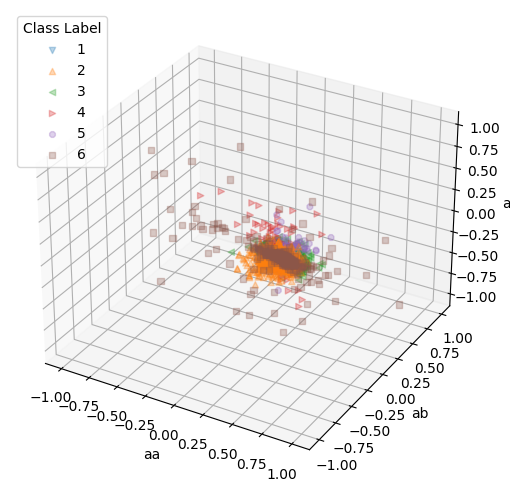

In [31]:
data= activity_df
subset=['aa', 'ab', 'ac']
markers = ['v', '^', '<', '>', '8', 's', 'p', '*', 'h', '+', 'x', 'D']
fig = plt.figure(figsize = (5.5,5))
fig.subplots_adjust(left=0.01, right=0.96, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
true_labels = data.sort_index().index.unique().tolist()
print(true_labels)

for i, true_label in enumerate(true_labels):
    temp = data.loc[true_label, :]
    # print(temp)
    xs = temp[subset[0]].tolist()
    ys = temp[subset[1]].tolist()
    zs = temp[subset[2]].tolist()
    ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3)
ax.set_xlabel('%s'%subset[0])
ax.set_ylabel('%s'%subset[1])
ax.set_zlabel('%s'%subset[2])
ax.legend(loc='upper left', title='Class Label')
plt.tight_layout()
plt.savefig('./%s_%s_%s_true_classes.png'%(subset[0], subset[1], subset[2]))

[1, 2, 3, 4, 5, 6]


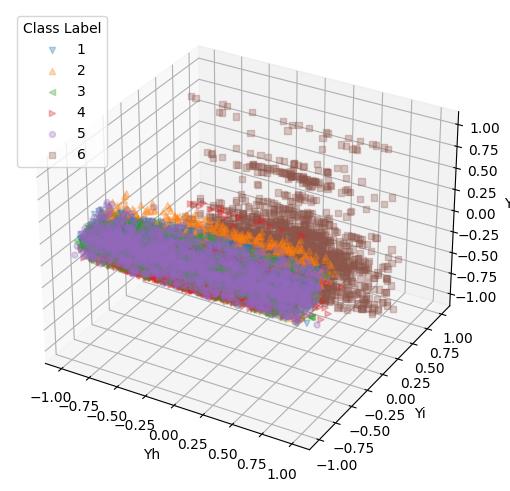

In [32]:
data= activity_df
subset=['Yh', 'Yi', 'Yj']
markers = ['v', '^', '<', '>', '8', 's', 'p', '*', 'h', '+', 'x', 'D']
fig = plt.figure(figsize = (5.5,5))
fig.subplots_adjust(left=0.01, right=0.96, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
true_labels = data.sort_index().index.unique().tolist()
print(true_labels)

for i, true_label in enumerate(true_labels):
    temp = data.loc[true_label, :]
    # print(temp)
    xs = temp[subset[0]].tolist()
    ys = temp[subset[1]].tolist()
    zs = temp[subset[2]].tolist()
    ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3)
ax.set_xlabel('%s'%subset[0])
ax.set_ylabel('%s'%subset[1])
ax.set_zlabel('%s'%subset[2])
ax.legend(loc='upper left', title='Class Label')
plt.tight_layout()
plt.savefig('./%s_%s_%s_true_classes.png'%(subset[0], subset[1], subset[2]))

In [33]:
def risk(i , x , loss_matrix, data_info):
    risk = 0
    for j, row in data_info.iterrows():
        #  Probability, mu, sigma^2
        try:
            #print(x)
            risk = risk + loss_matrix[i][int(row['True Class Label'])-1]*row['Class Prior']*multivariate_normal.pdf(x,row['Mean Vector'],row['Covariance Matrix'])
            #print(risk)
        except np.linalg.LinAlgError:
            continue
    return risk

In [34]:
data = activity_df
loss_matrix = None
true_class_label='quality'
choices  = []
correct = []
dimension_labels = data.columns.tolist()
class_labels     = data.sort_index().index.unique().tolist()
# Create 0-1 loss matrix if none is given
if(loss_matrix==None):
    d = max(class_labels)
    loss_matrix = np.zeros((d,d))
    for i in range(0,d):
        for j in range(0,d):
            if(i==j):
                loss_matrix[i][j] = 0
            else:
                loss_matrix[i][j] = 1
print(loss_matrix)
labels_reference  = {i:class_labels[i] for i in range(0,len(class_labels))}
for idx, row in data.iterrows():
    # Modify class label for computation
    distribution = int(row.name)
    rows         = [row[dimension_label] for dimension_label in dimension_labels]
    #print(rows)
    #print(class_labels)
    args         = [risk(class_label-1, rows, loss_matrix, data_info) for class_label in class_labels]
    choice = labels_reference[np.argmin(args)]
    choices.append(choice)
    # print('Choice: %d'%choice)
    # print('Correct: %d'%distribution)
    # Check if classification was correct or not
    if(choice==distribution):
        correct.append(True)
        # print('Correct!: %d'%len(correct))
    else:
        correct.append(False)
data['ERM Classification'] = choices
data['Correct']            = correct
print(data)

activity_df = data
print(activity_df)
activity_df.to_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_3\PART_B\activity_df_data.csv')


[[0. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0.]]
             aa        ab        ac        Yh        Yi        Yj  \
Index                                                               
5      0.257178 -0.023285 -0.014654  0.271151 -0.720009  0.276801   
5      0.286027 -0.013163 -0.119083  0.920593 -0.698091  0.281343   
5      0.275485 -0.026050 -0.118152  0.145068 -0.702771  0.280083   
5      0.270298 -0.032614 -0.117520  0.296407 -0.698954  0.284114   
5      0.274833 -0.027848 -0.129527 -0.118545 -0.692245  0.290722   
...         ...       ...       ...       ...       ...       ...   
2      0.299665 -0.057193 -0.181233 -0.425619 -0.791883  0.238604   
2      0.273853 -0.007749 -0.147468  0.400219 -0.771840  0.252676   
2      0.273387 -0.017011 -0.045022  0.701169 -0.779133  0.249145   
2      0.289654 -0.018843 -0.158281 -0.589479 -0.785181  0.246432   
2      0.351503 -0.012423 -0.203867 -0.616956

Number of correct classified points: 7015
Number of incorrect classified points: 3284


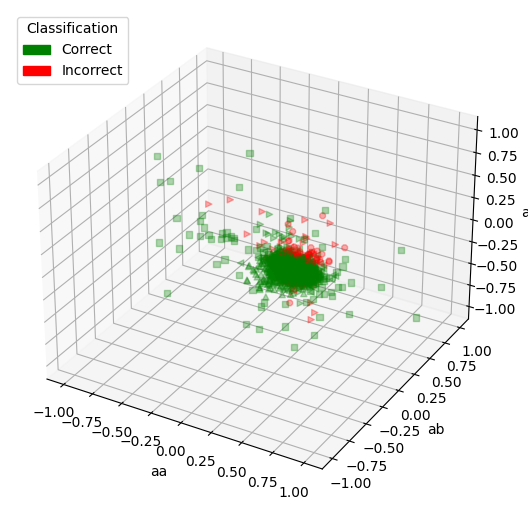

In [35]:

subset=['aa', 'ab', 'ac']
markers = ['v', '^', '<', '>', '8', 's', 'p', '*', 'h', '+', 'x', 'D']
fig = plt.figure(figsize = (5.5,5))
fig.subplots_adjust(left=0.01, right=0.96, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
# Plot correct
correct = data[data['Correct']==True]
true_labels = correct.sort_index().index.unique().tolist()
print('Number of correct classified points: %d'%correct.shape[0])
for i, true_label in enumerate(true_labels):
    temp = correct.loc[true_label, :]
    xs = temp[subset[0]].tolist()
    ys = temp[subset[1]].tolist()
    zs = temp[subset[2]].tolist()
    ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3, color='green')
# Plot incorrect
correct = data[data['Correct']==False]
true_labels = correct.sort_index().index.unique().tolist()
print('Number of incorrect classified points: %d'%correct.shape[0])
for i, true_label in enumerate(true_labels):
    temp = correct.loc[true_label, :]
    xs = temp[subset[0]].tolist()
    ys = temp[subset[1]].tolist()
    zs = temp[subset[2]].tolist()
    ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3, color='red')
ax.set_xlabel('%s'%subset[0])
ax.set_ylabel('%s'%subset[1])
ax.set_zlabel('%s'%subset[2])
#ax.get_legend().remove()
green_patch = mpatches.Patch(color='green', label='Correct')
red_patch = mpatches.Patch(color='red', label='Incorrect')
ax.legend(handles=[green_patch, red_patch], loc='upper left', title='Classification')
plt.savefig('./%s_%s_%s_true_class_classified_loss_health_data_1.png'%(subset[0], subset[1], subset[2]))

Number of correct classified points: 7015
Number of incorrect classified points: 3284


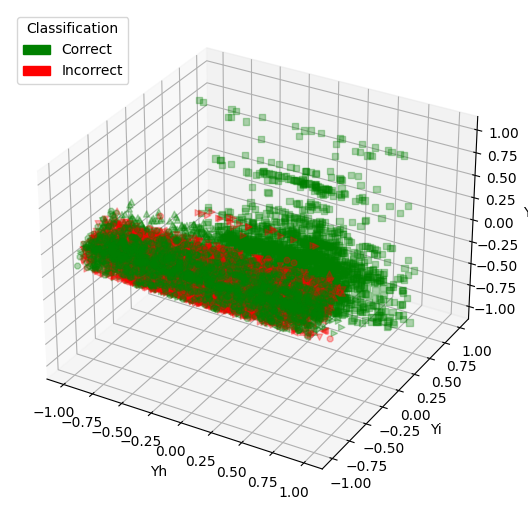

In [36]:

subset=['Yh', 'Yi', 'Yj']
markers = ['v', '^', '<', '>', '8', 's', 'p', '*', 'h', '+', 'x', 'D']
fig = plt.figure(figsize = (5.5,5))
fig.subplots_adjust(left=0.01, right=0.96, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
# Plot correct
correct = data[data['Correct']==True]
true_labels = correct.sort_index().index.unique().tolist()
print('Number of correct classified points: %d'%correct.shape[0])
for i, true_label in enumerate(true_labels):
    temp = correct.loc[true_label, :]
    xs = temp[subset[0]].tolist()
    ys = temp[subset[1]].tolist()
    zs = temp[subset[2]].tolist()
    ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3, color='green')
# Plot incorrect
correct = data[data['Correct']==False]
true_labels = correct.sort_index().index.unique().tolist()
print('Number of incorrect classified points: %d'%correct.shape[0])
for i, true_label in enumerate(true_labels):
    temp = correct.loc[true_label, :]
    xs = temp[subset[0]].tolist()
    ys = temp[subset[1]].tolist()
    zs = temp[subset[2]].tolist()
    ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3, color='red')
ax.set_xlabel('%s'%subset[0])
ax.set_ylabel('%s'%subset[1])
ax.set_zlabel('%s'%subset[2])
#ax.get_legend().remove()
green_patch = mpatches.Patch(color='green', label='Correct')
red_patch = mpatches.Patch(color='red', label='Incorrect')
ax.legend(handles=[green_patch, red_patch], loc='upper left', title='Classification')
plt.savefig('./%s_%s_%s_true_class_classified_loss_health_data_2.png'%(subset[0], subset[1], subset[2]))

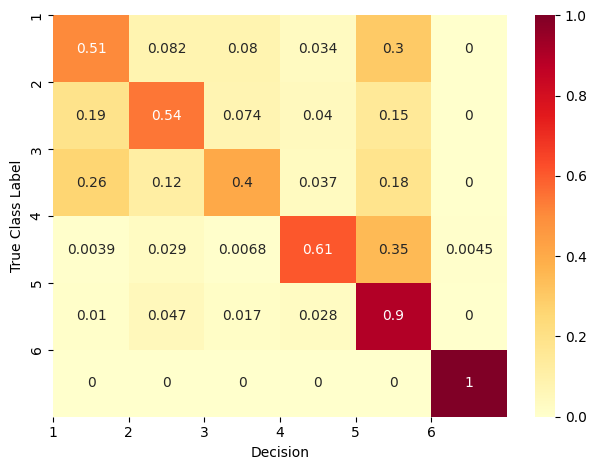

In [37]:
pred = data['ERM Classification'].tolist()
act  = data.index.tolist()
class_labels = data.sort_index().index.unique().tolist()
confusion = confusion_matrix(act, pred, normalize='true')
sns.heatmap(data=confusion,cmap="YlOrRd",annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Decision')
plt.ylabel('True Class Label')
positions = range(0,len(class_labels))
plt.xticks(positions, class_labels)
plt.yticks(positions, class_labels)
plt.tight_layout()
plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_3\PART_B\decision_matrix.png')